In [56]:
#Importing in libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Importing dataset to base dataframe in pandas
df = pd.read_csv('APD_Incident_Extract_2010.csv')

In [4]:
df.head(5)

,Incident Report Number,Crime Type,Date,Time,LOCATION_TYPE,ADDRESS,LONGITUDE,LATITUDE,Location 1
0,20105067300,CRASH/LEAVING THE SCENE,12/18/2010,1100,NaN,11200 BLOCK LAKELINE MALL DR,NaN,NaN,NaN
1,20105067330,CRIMINAL MISCHIEF,12/20/2010,1200,NaN,WEST LYNN ST / W 6TH ST,-97.762642,30.274826,NaN
2,20105067629,COUNTERFEITING,12/21/2010,1650,NaN,2700 BLOCK GONZALES ST,NaN,NaN,NaN
3,20101020316,CRIMINAL MISCHIEF,04/12/2010,559,NaN,6200 BLOCK MANOR RD,NaN,NaN,NaN
4,20105019108,BURGLARY OF VEHICLE,04/15/2010,1200,NaN,4600 BLOCK ELMONT DR,NaN,NaN,NaN


In [6]:
#Already seeing NaNs in LOCATION_TYPE, LONGITUDE, LATITUDE, LOCATION 1, but first I'm interested in the type of crimes

In [9]:
df.columns=['incRepNum', 'crimeType', 'date','time', 'locationType', 'address', 'longitude', 'latitude', 'location1']

In [15]:
df.crimeType.unique()

array(['CRASH/LEAVING THE SCENE', 'CRIMINAL MISCHIEF', 'COUNTERFEITING',
       'BURGLARY OF VEHICLE', 'THEFT', 'CUSTODY ARREST TRAFFIC WARR',
       'ASSIST EMS', 'THEFT OF VEHICLE/OTHER', 'FAMILY DISTURBANCE',
       'ASSAULT BY CONTACT FAM/DATING', 'LOST PROP',
       'EMERGENCY PROTECTIVE ORDER', 'HARASSMENT', 'DEBIT CARD ABUSE',
       'FORGERY AND PASSING', 'SUSPICIOUS PERSON',
       'SEXUAL ASSAULT INFORMATION', 'FAILURE TO IDENTIFY',
       'FAMILY DISTURBANCE/PARENTAL', 'CAREER CRIMINAL UNIT',
       'VOCO AMPLIFIED MUSIC/VEHICLE', 'WARRANT ARREST NON TRAFFIC',
       'REQUEST TO APPREHEND', 'VIOL STATE LAW - OTHER', 'DWI',
       'VIOL CITY ORDINANCE - OTHER', 'DEL CONTROLLED SUB/NARCOTIC',
       'THEFT OF BICYCLE', 'AUTO THEFT', 'BURGLARY NON RESIDENCE',
       'GRAFFITI', 'DISTURBANCE - OTHER', 'SUSPICIOUS VEH',
       'CRIMINAL TRESPASS', 'POSS MARIJUANA',
       'ASSAULT W/INJURY-FAM/DATE VIOL', 'DWI 2ND',
       'CRIMINAL TRESPASS/TRANSIENT', 'REQUEST TO LOCATE',
     

In [14]:
len(df.crimeType.unique())

414

In [24]:
#Separating out crimes distinctly involving technology.

techCrimes = ['HIGH TECH CRIME', 'CYBER CRIMES']
dfTech = df[df.crimeType.isin(techCrimes)] 

In [40]:
dfTech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 5299 to 147464
Data columns (total 9 columns):
incRepNum       9 non-null int64
crimeType       9 non-null object
date            9 non-null object
time            9 non-null int64
locationType    0 non-null float64
address         9 non-null object
longitude       0 non-null float64
latitude        0 non-null float64
location1       0 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 720.0+ bytes


In [41]:
#A rather low number of reports to say the least.
dfTech

,incRepNum,crimeType,date,time,locationType,address,longitude,latitude,location1
5299,20105013908,CYBER CRIMES,03/19/2010,1730,NaN,10700 BLOCK HENDON ST,NaN,NaN,NaN
11313,20105023665,CYBER CRIMES,05/08/2010,2039,NaN,1400 BLOCK BRAES RIDGE DR,NaN,NaN,NaN
26174,20105005184,HIGH TECH CRIME,01/31/2010,1149,NaN,5000 BLOCK OLD MANOR RD,NaN,NaN,NaN
49869,20105015322,HIGH TECH CRIME,03/29/2010,105,NaN,7700 BLOCK RIALTO BLVD,NaN,NaN,NaN
58225,20105014613,HIGH TECH CRIME,03/24/2010,1945,NaN,3000 BLOCK BELGRAVE FALLS LN,NaN,NaN,NaN
69931,20105013934,CYBER CRIMES,03/22/2010,924,NaN,900 BLOCK W 30TH ST,NaN,NaN,NaN
72340,20102011522,HIGH TECH CRIME,07/20/2010,1611,NaN,500 BLOCK W WILLIAM CANNON DR,NaN,NaN,NaN
126014,20105032185,CYBER CRIMES,06/12/2010,2222,NaN,11900 BLOCK STONEHOLLOW DR,NaN,NaN,NaN
147464,20105015088,CYBER CRIMES,03/24/2010,1900,NaN,11700 BLOCK METRIC BLVD,NaN,NaN,NaN


In [44]:
#Comparatively, what are the most highly reported crimes? 

#First get NaNs out of the way.
df = df.dropna(subset=['crimeType'])

In [46]:
#Confirming NaN are dropped.
len(df.crimeType.unique())


413

In [50]:
val_counts = df.crimeType.value_counts()

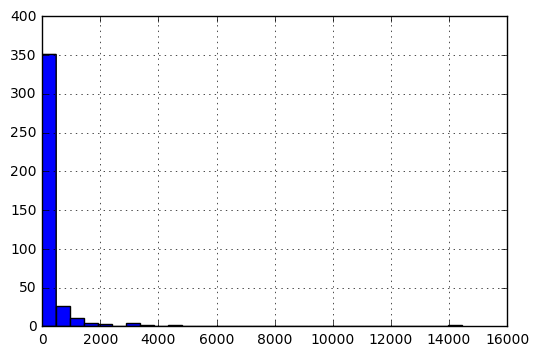

In [70]:
val_counts.hist(bins=30)

In [80]:
#Looks like a vast drop off below around 1k, time to grab occurrences equal to and greater than 1k in value count. 
oneKPlusVals = df.crimeType.value_counts()[df.crimeType.value_counts()>999] 


In [81]:
oneKPlusVals

BURGLARY OF VEHICLE               14437
THEFT                             14192
FAMILY DISTURBANCE                 8188
CRASH/LEAVING THE SCENE            8059
CRIMINAL MISCHIEF                  7390
BURGLARY OF RESIDENCE              6305
PUBLIC INTOXICATION                5460
HARASSMENT                         5257
DWI                                4660
CUSTODY ARREST TRAFFIC WARR        4524
ASSAULT W/INJURY-FAM/DATE VIOL     4185
LOST PROP                          3679
WARRANT ARREST NON TRAFFIC         3394
DISTURBANCE - OTHER                3349
CRIMINAL TRESPASS                  3306
REQUEST TO APPREHEND               3092
POSS MARIJUANA                     2963
ASSAULT WITH INJURY                2434
AUTO THEFT                         2322
BURGLARY NON RESIDENCE             2114
DRIVING WHILE LICENSE INVALID      1932
EMERGENCY PROTECTIVE ORDER         1911
POSS OF DRUG PARAPHERNALIA         1530
POSS CONTROLLED SUB/NARCOTIC       1502
THEFT BY SHOPLIFTING               1494


In [82]:
len(oneKPlusVals)

35

In [83]:
len(oneKPlusVals) / len(df.crimeType.unique())

0.0847457627118644